In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
def load_data(file_path=r"C:\Users\Diway Mandhan\Desktop\DATASCIENCE PROJECT\parkinsons.csv"):
    parkinson = pd.read_csv(file_path)
    return parkinson 


In [4]:
parkinson = load_data()

In [5]:
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
print(parkinson.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [7]:
parkinson.shape

(195, 24)

In [8]:
parkinson.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
parkinson.duplicated().sum()

0

In [12]:
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
parkinson['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [14]:
X = parkinson.drop(['status', 'name'], axis=1)
Y = parkinson['status']

In [15]:
print(parkinson.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [16]:
X.shape

(195, 22)

In [17]:
Y.shape

(195,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
scalar = StandardScaler()

In [20]:
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [21]:
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [22]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_predict)
        print(f"{name} accuracy: {accuracy}")

      

def make_prediction(model, input_data):
    prediction = model.predict(np.asarray(input_data).reshape(1, -1))

    if prediction == 1:
        print("This person has Parkinson's disease.")
    else:
        print("This person does not have Parkinson's disease.")

# Train and evaluate models
train_and_evaluate_models(X_train, X_test, y_train, y_test)


Logistic Regression accuracy: 0.8205128205128205
K-Nearest Neighbors accuracy: 0.7692307692307693
Support Vector Machine accuracy: 0.8974358974358975
Decision Tree accuracy: 0.7435897435897436
Random Forest accuracy: 0.8461538461538461


In [23]:
svc = SVC()
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)
accuracy_score(y_test,y_predict)

0.8974358974358975

In [24]:
X_train[9]

array([ 1.2921936 ,  0.22899355,  1.81167666, -0.0765481 , -0.40011041,
        0.06269468, -0.06669453,  0.06367861, -0.68671488, -0.69281557,
       -0.65125315, -0.65230321, -0.68302934, -0.65156195, -0.43291555,
        0.16935684, -1.48939098, -0.13410961, -0.71145846, -0.48265249,
        0.27660783, -0.7714226 ])

In [25]:
input_data = (1.2921936 ,  0.22899355,  1.81167666, -0.0765481 , -0.40011041,
        0.06269468, -0.06669453,  0.06367861, -0.68671488, -0.69281557,
       -0.65125315, -0.65230321, -0.68302934, -0.65156195, -0.43291555,
        0.16935684, -1.48939098, -0.13410961, -0.71145846, -0.48265249,
        0.27660783, -0.7714226)
make_prediction(svc, input_data)

This person has Parkinson's disease.


Logistic Regression with accuracy: 0.8205128205128205


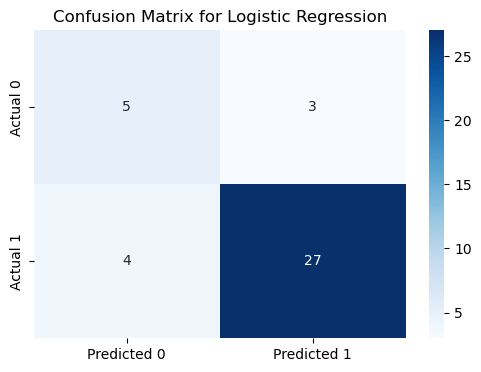

K-Nearest Neighbors with accuracy: 0.7692307692307693


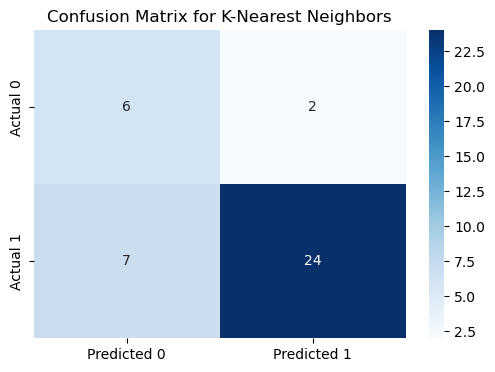

Support Vector Machine with accuracy: 0.8974358974358975


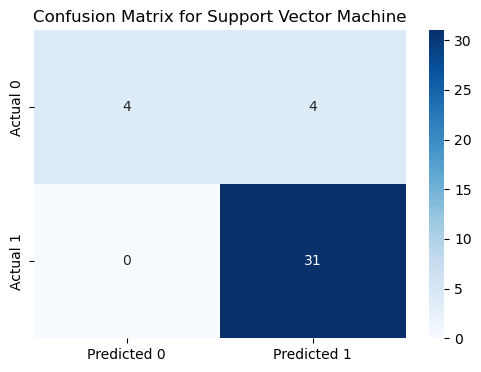

Decision Tree with accuracy: 0.7435897435897436


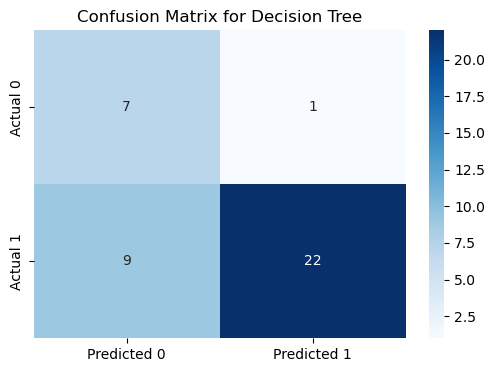

Random Forest with accuracy: 0.8461538461538461


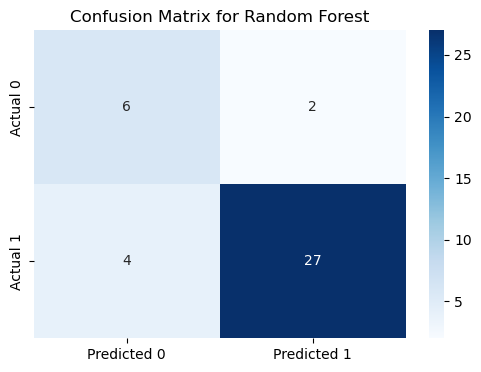

In [26]:
models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
        "Support Vector Machine": SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_predict)
    print(f"{name} with accuracy: {accuracy}")

    cm = confusion_matrix(y_test, y_predict)


  
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.show()



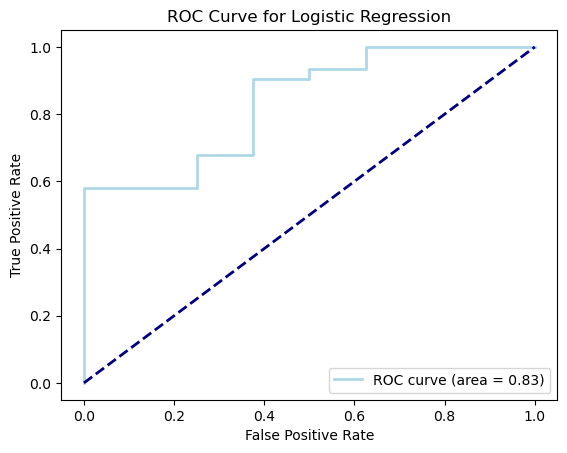

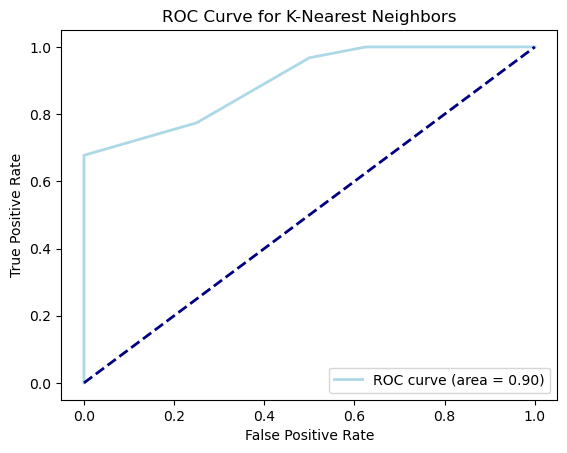

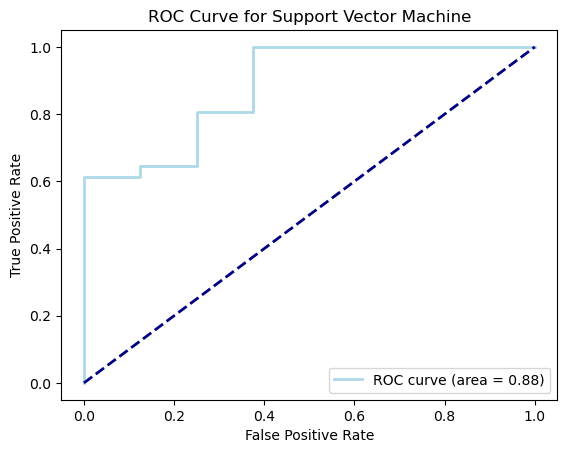

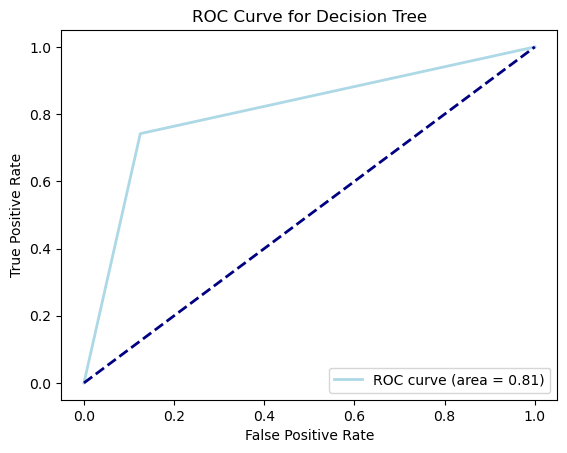

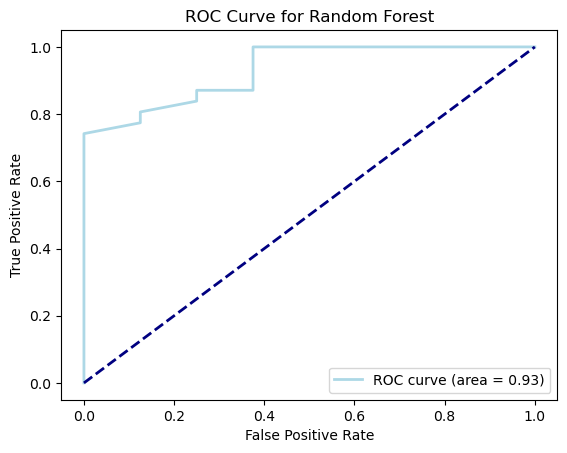

In [27]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    # ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Visualize ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

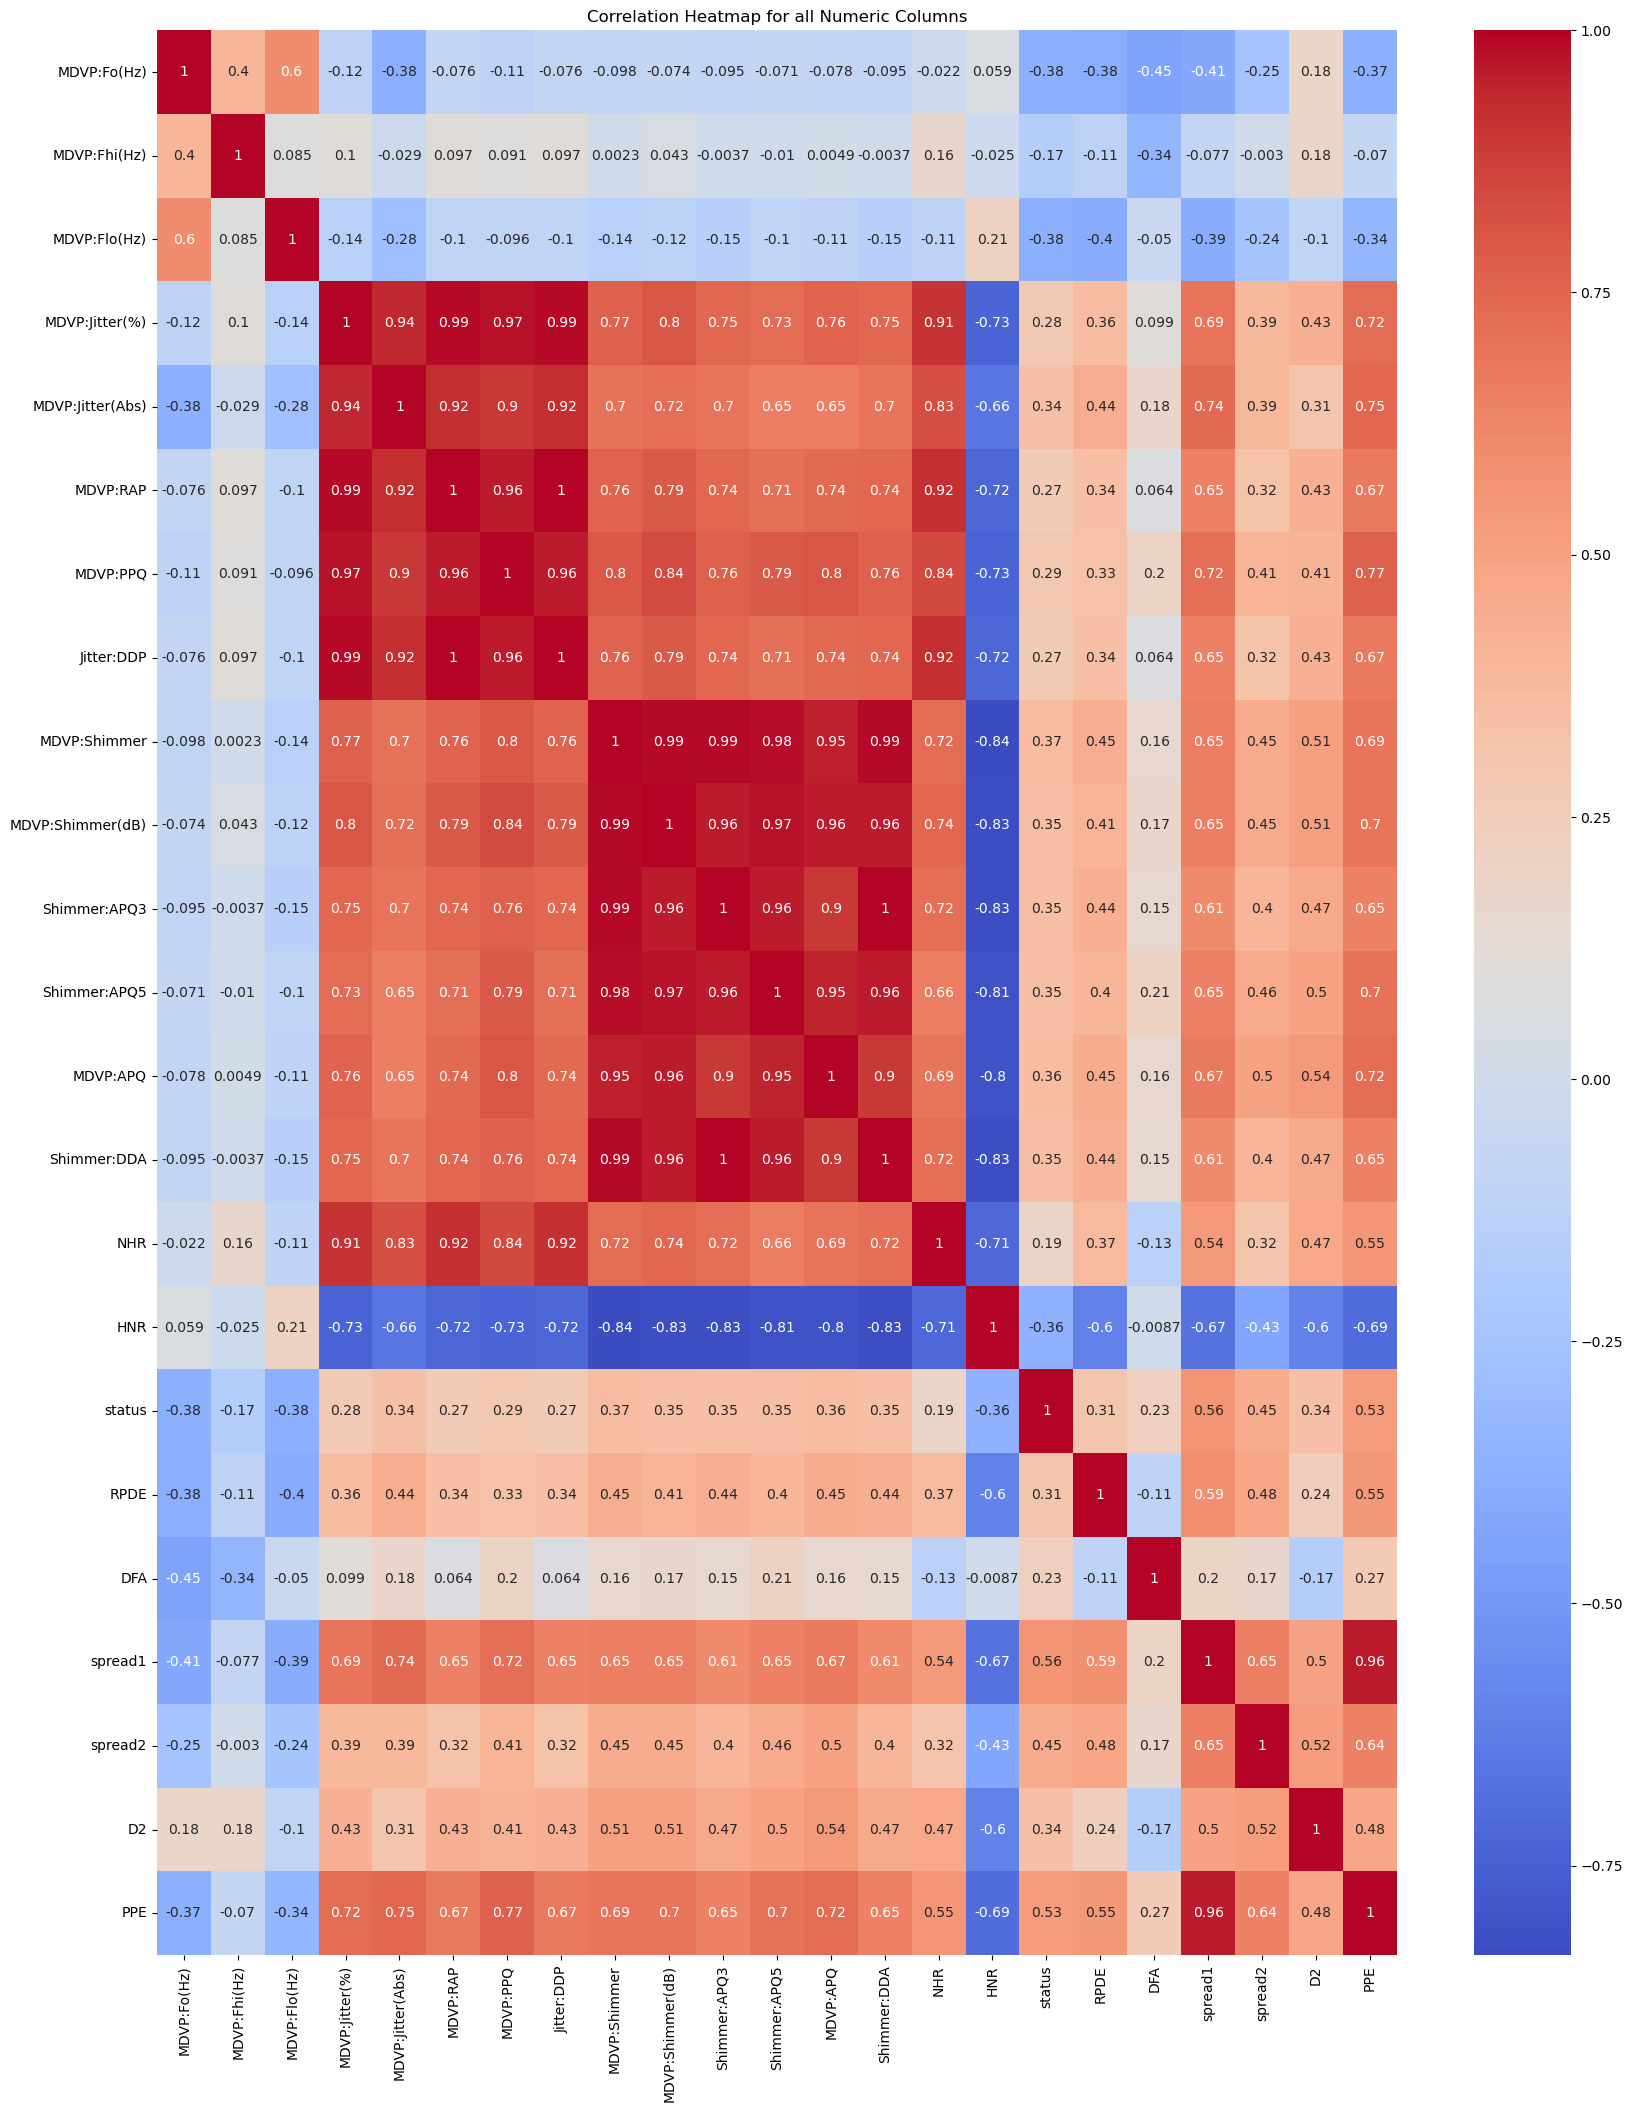

In [28]:
import seaborn as sns


numeric_columns = parkinson.select_dtypes(include=[np.number])

correlation_matrix_all = numeric_columns.corr()
plt.figure(figsize=(20, 25))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for all Numeric Columns')
plt.show()

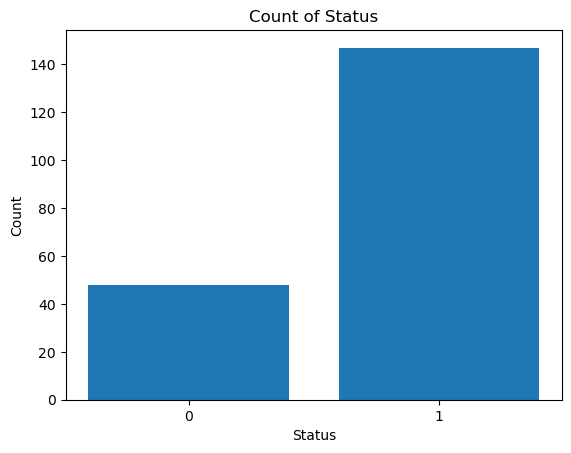

In [29]:
status_count = parkinson['status'].value_counts()
filtered_status_count = status_count.loc[[0, 1]]

plt.bar(filtered_status_count.index, filtered_status_count.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Status')
plt.xticks(filtered_status_count.index) 
plt.show()


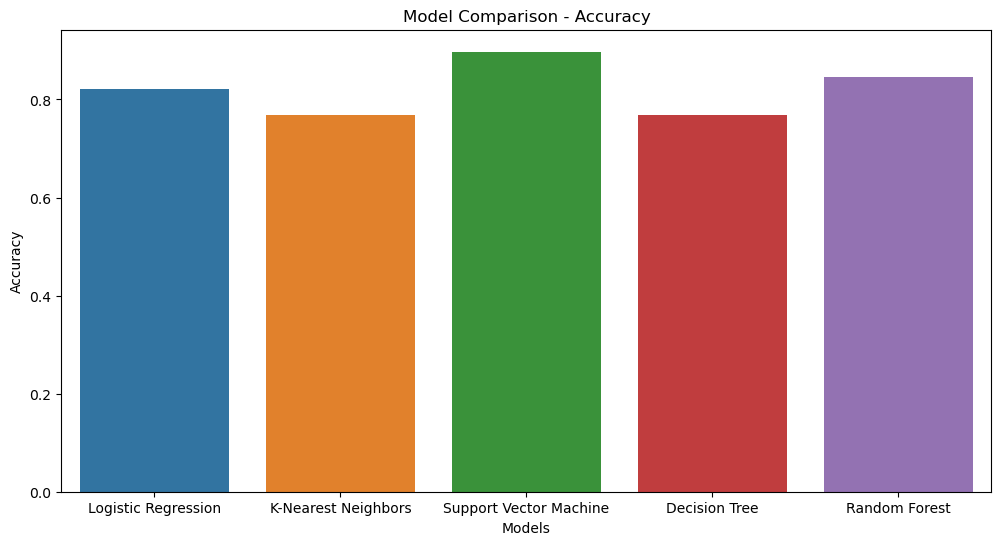

In [30]:


# Training the models and collecting accuracy scores
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracies[name] = accuracy
    

# Plotting bar plot for model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

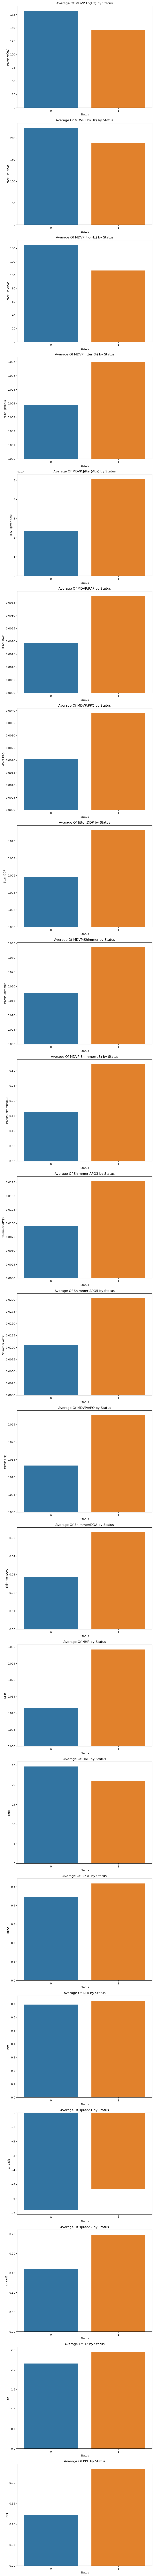

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
                    'spread1', 'spread2', 'D2', 'PPE']

# Create figure and axes
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 6 * len(selected_columns)))

# Loop through each column and create a bar plot
for i, col in enumerate(selected_columns):
    # Calculate the mean of each column based on 'status'
    avg_by_status = parkinson.groupby('status')[col].mean().reset_index()
    
    # Plotting
    sns.barplot(x='status', y=col, data=avg_by_status, ax=axes[i])
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Average Of {col} by Status')

plt.tight_layout()
plt.show()


In [76]:

# new_data = pd.read_csv(r'C:\Users\Diway Mandhan\Desktop\4.csv')


# new_data_scaled = scalar.transform(new_data)


# prediction = svc.predict(new_data_scaled)

# if (prediction == 1).all():
#    print("all person has Parkinson's disease.")
# else:
#    print("No person has Parkinson's disease.")

